# 6 months sales forecast

- check the AIC of the forecast 

- plug into powerbi 
- make it updateable / refreshable? 



In [90]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
from datetime import timedelta
from statsmodels.tsa.seasonal import seasonal_decompose



In [91]:
# LOADING DATA

import pandas as pd

# GET DATA 
file_path = r"C:\Users\Isabel\desktop\data-science-comp\Order Data.xlsx"
df = pd.read_excel(file_path)


In [92]:
# Group by 'Order ID' and aggregate 'Order Date' and 'Sales'
df_grouped = df.groupby('Order ID').agg({
    'Order Date': 'first',  # Use 'first', 'min', or 'max' for 'Order Date'
    'Sales': 'sum'          # Sum the sales for each 'Order ID'
}).reset_index()

# Convert 'Order Date' to datetime if not already done
df_grouped['Order Date'] = pd.to_datetime(df_grouped['Order Date'])

# Set 'Order Date' as the index
df_grouped.set_index('Order Date', inplace=True)

# Sort the DataFrame by the index (Order Date)
df_grouped.sort_index(inplace=True)

# Resample the data to get monthly sales data
df_monthly = df_grouped['Sales'].resample('M').sum()

In [93]:
warnings.filterwarnings("ignore")

# FITTING THE AUTO ARIMA MODEL
auto_model = auto_arima(df_monthly, seasonal=True, m=12, trace=True,
                        error_action='ignore', suppress_warnings=True,
                        stepwise=True)

# FIT THE BEST MODEL
auto_model_fit = auto_model.fit(df_monthly)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=996.467, Time=0.51 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1006.421, Time=0.02 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=1000.256, Time=0.07 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.27 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1076.692, Time=0.02 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=1001.939, Time=0.20 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=994.576, Time=0.27 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=1012.408, Time=0.12 sec
 ARIMA(2,0,2)(2,0,0)[12] intercept   : AIC=996.403, Time=0.52 sec
 ARIMA(2,0,2)(2,0,1)[12] intercept   : AIC=998.400, Time=0.73 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept   : AIC=996.323, Time=0.19 sec
 ARIMA(2,0,1)(1,0,0)[12] intercept   : AIC=inf, Time=0.37 sec
 ARIMA(3,0,2)(1,0,0)[12] intercept   : AIC=995.021, Time=0.28 sec
 ARIMA(2,0,3)(1,0,0)[12] intercept   : AIC=993.016, Time=0.34 sec
 ARIMA(2,0,3)(0,0,0)[12] intercept  

In [94]:
# MAKE FORECAST
forecast_steps = 6  # 6 months ahead
forecast = model.predict(n_periods=forecast_steps)

In [95]:
# CREATE DATE INDEX FOR FORECAST
forecast_index = pd.date_range(df_monthly.index[-1] + timedelta(days=1), periods=forecast_steps, freq='M')


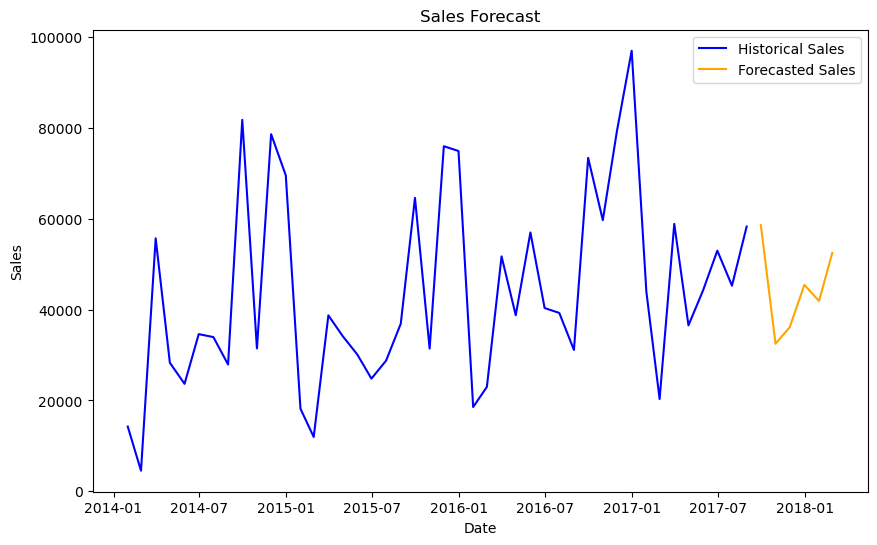

In [96]:
# PLOT HISTORICAL SALES AND FORECAST
plt.figure(figsize=(10, 6))
plt.plot(df_monthly.index, df_monthly, label='Historical Sales', color='blue')
plt.plot(forecast_index, forecast, label='Forecasted Sales', color='orange')
plt.title('Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()